In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_20',
                          'g_descending',
                          'refPTs_P_500_T_250',
                          'ng_refs_20',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'bigsum',
                          'option_wgt_1',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_20',
                          'g_descending',
                          'refPTs_P_500_T_250',
                          'ng_refs_20',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'bigsum',
                          'option_wgt_1',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 20 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 20

nref = 1

p_refs = (/ 500 /)

t_refs = (/ 250 /)

ng_refs = (/ 20 /)

data wgt
     &     /20 * 1/

planck_wgt_flux = 2

option_wgt = 1

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

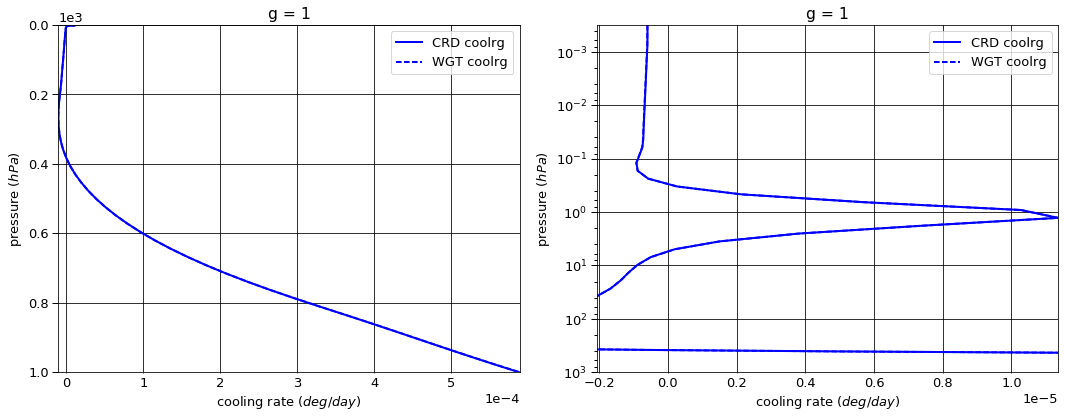

# Figure: cooling rate g-group 2

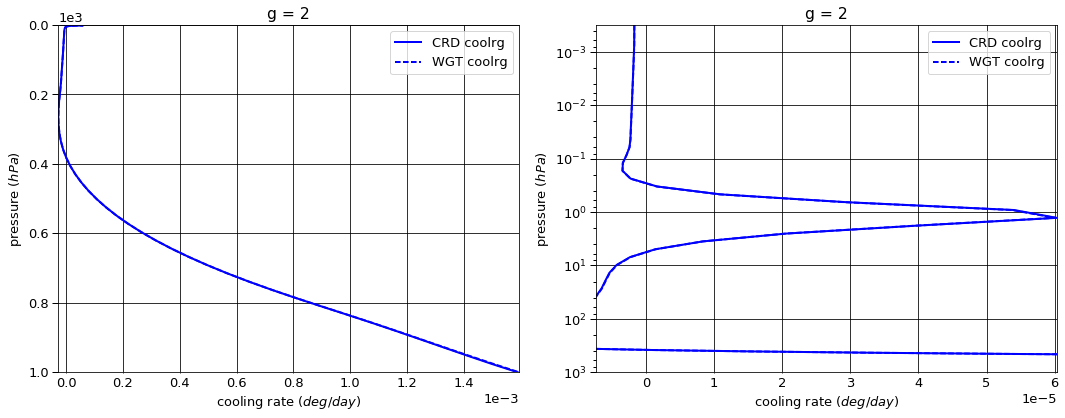

# Figure: cooling rate g-group 3

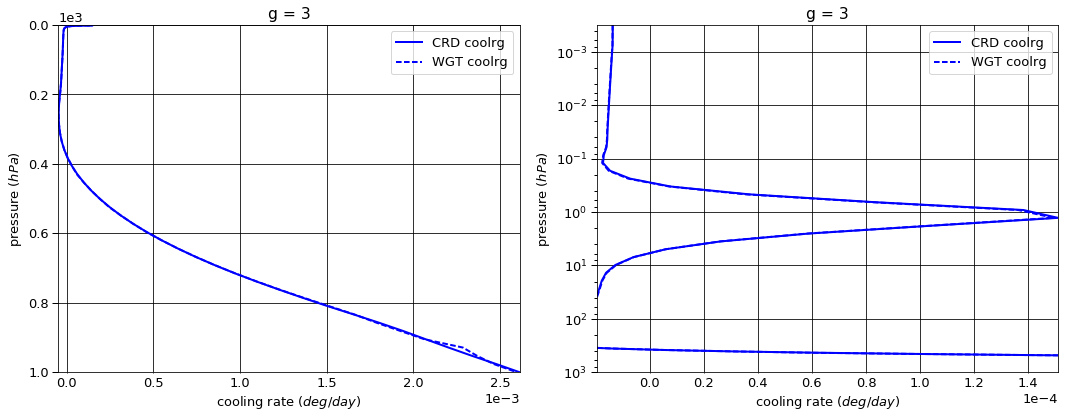

# Figure: cooling rate g-group 4

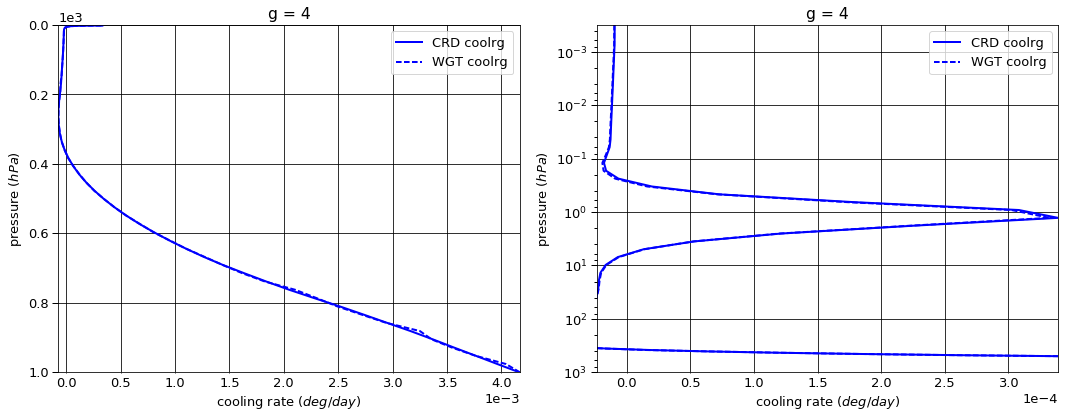

# Figure: cooling rate g-group 5

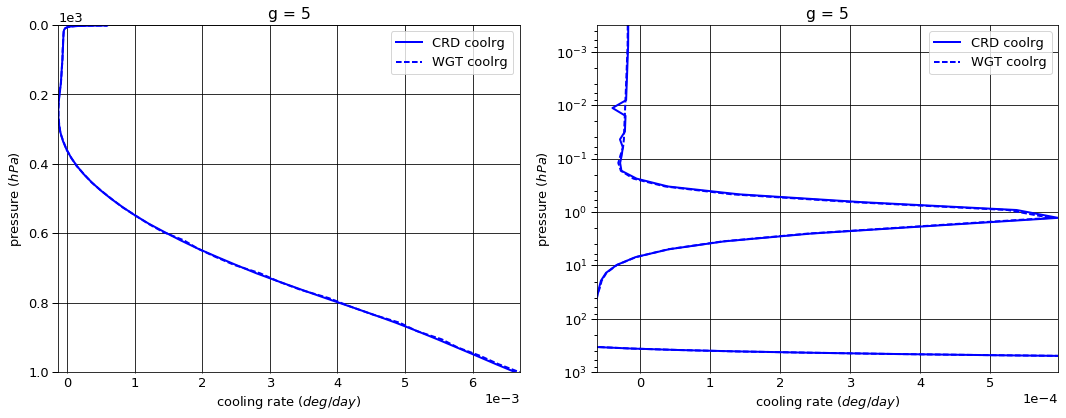

# Figure: cooling rate g-group 6

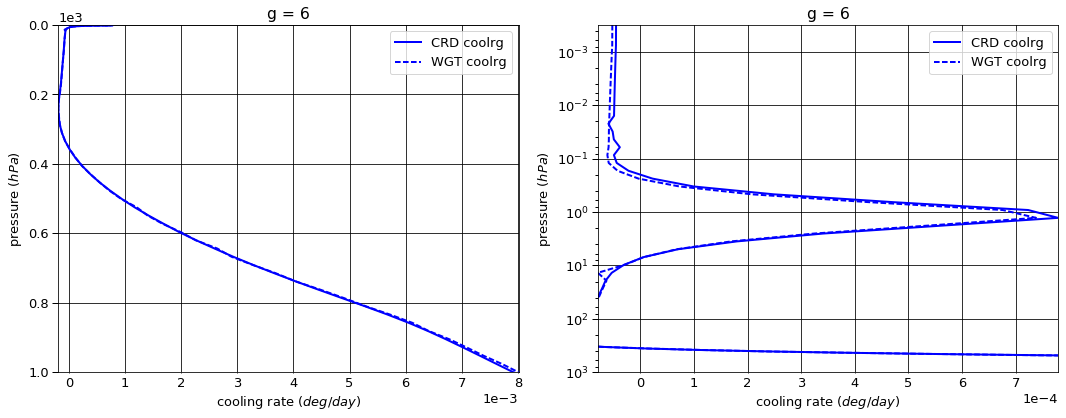

# Figure: cooling rate g-group 7

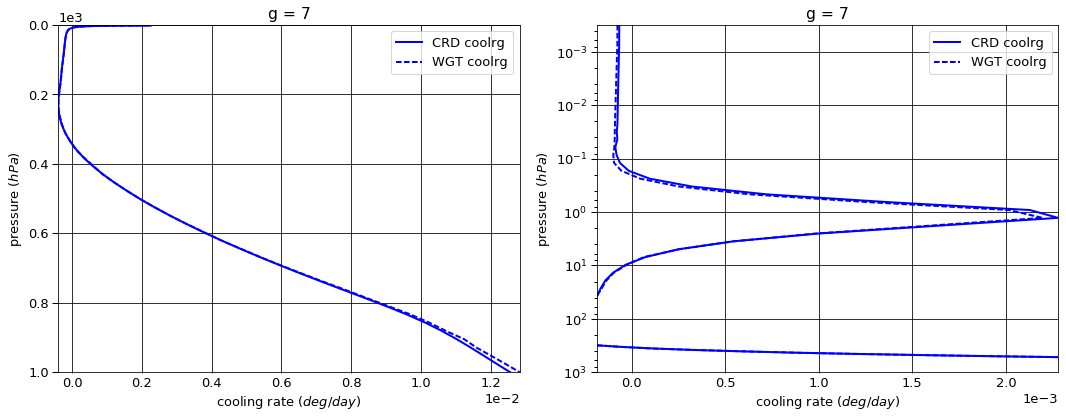

# Figure: cooling rate g-group 8

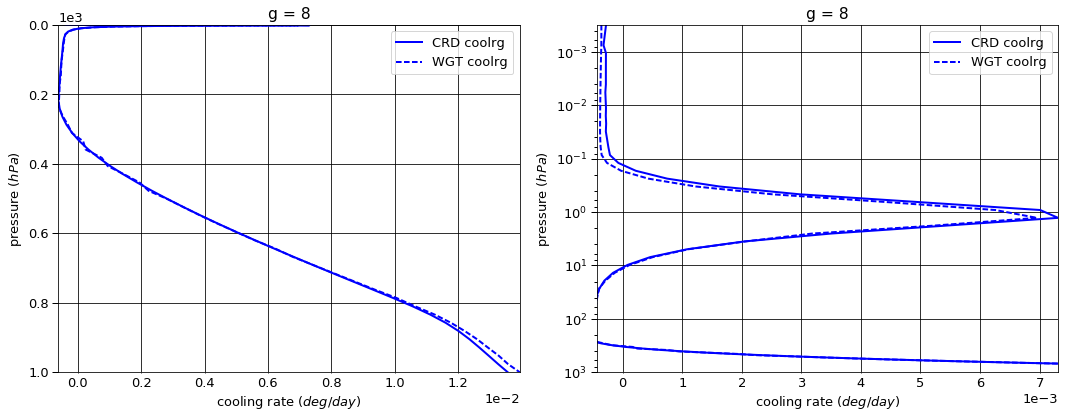

# Figure: cooling rate g-group 9

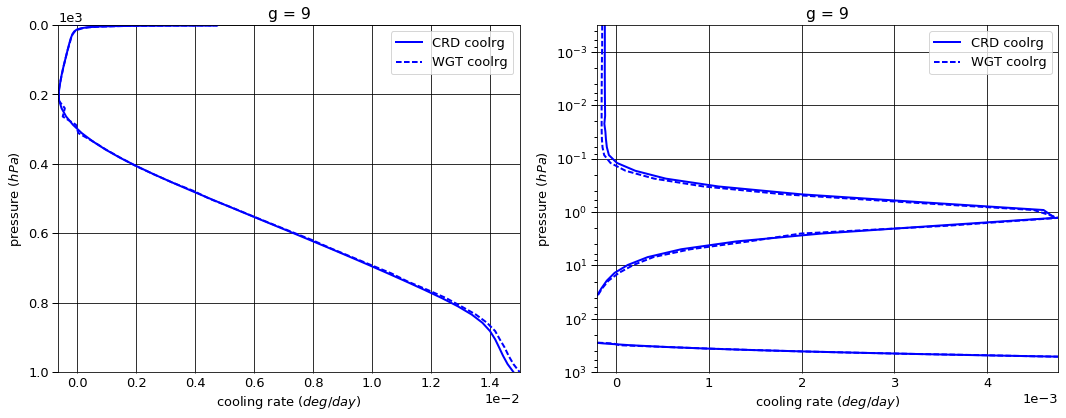

# Figure: cooling rate g-group 10

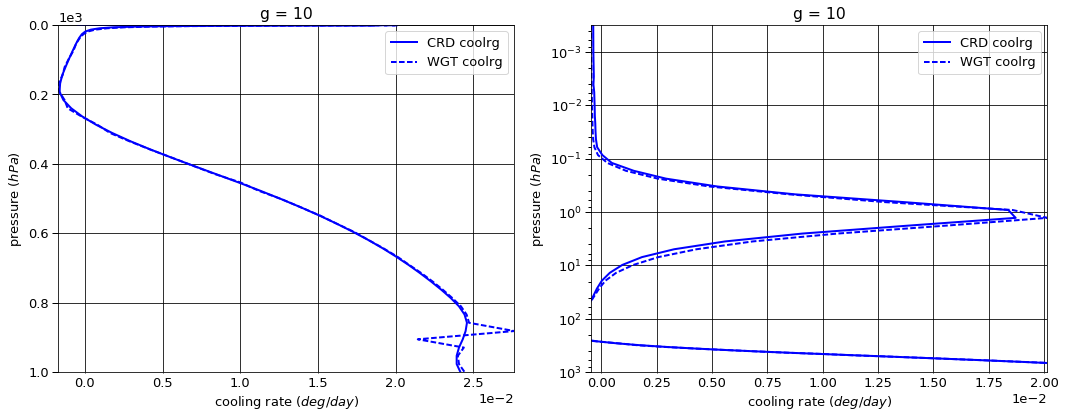

# Figure: cooling rate g-group 11

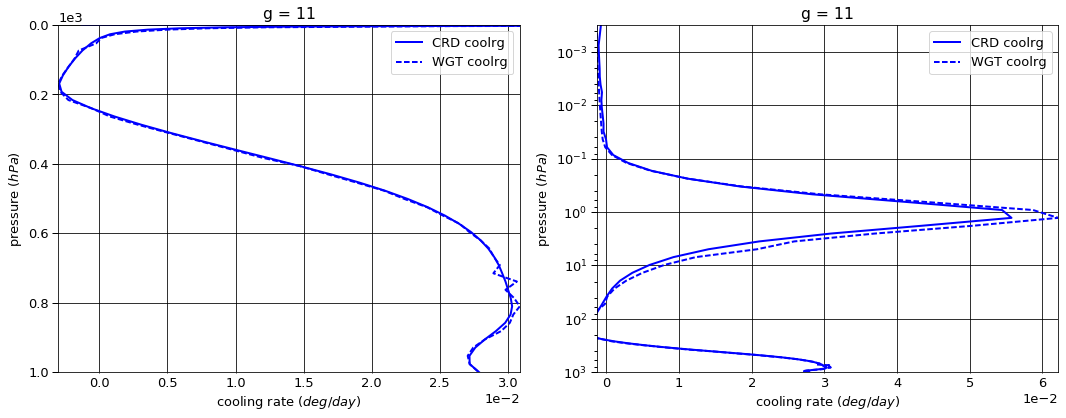

# Figure: cooling rate g-group 12

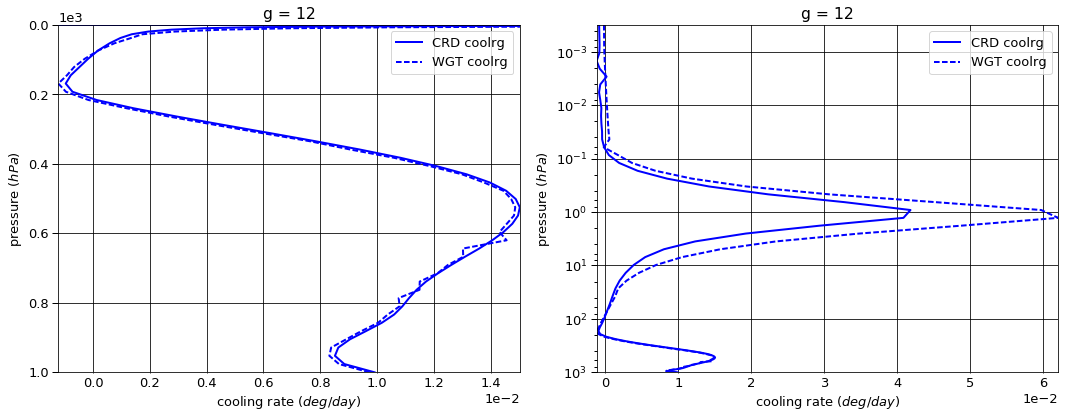

# Figure: cooling rate g-group 13

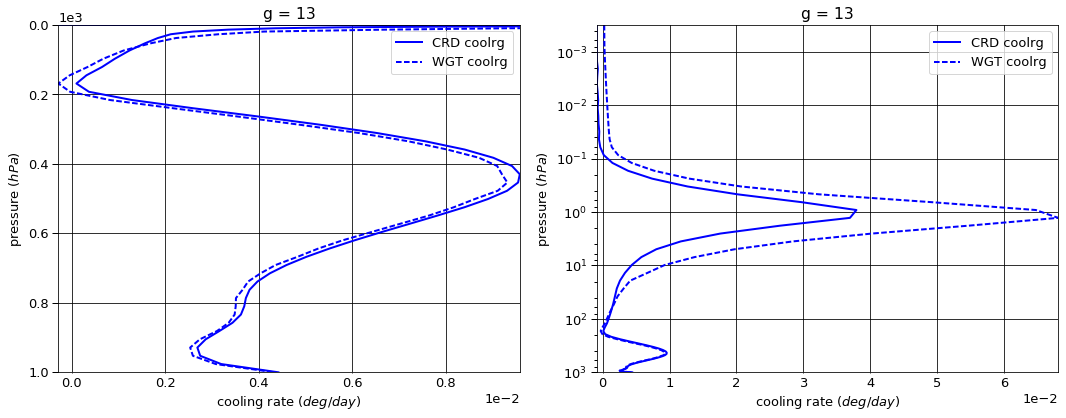

# Figure: cooling rate g-group 14

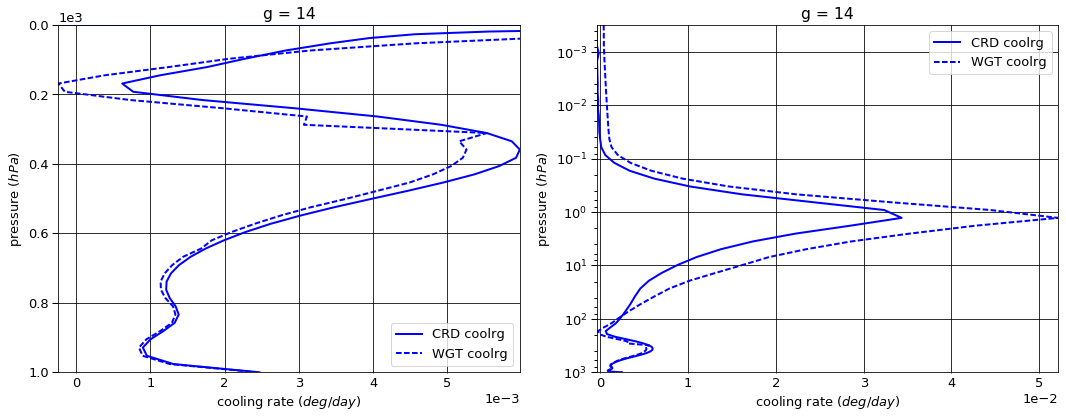

# Figure: cooling rate g-group 15

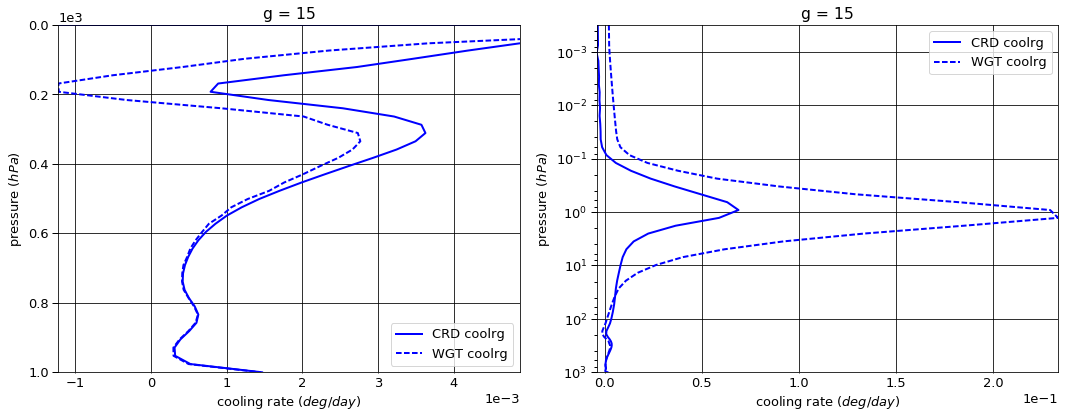

# Figure: cooling rate g-group 16

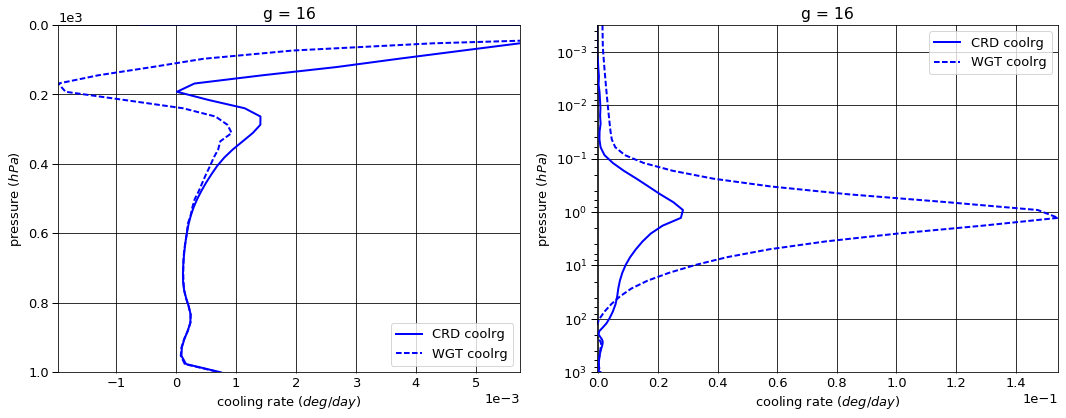

# Figure: cooling rate g-group 17

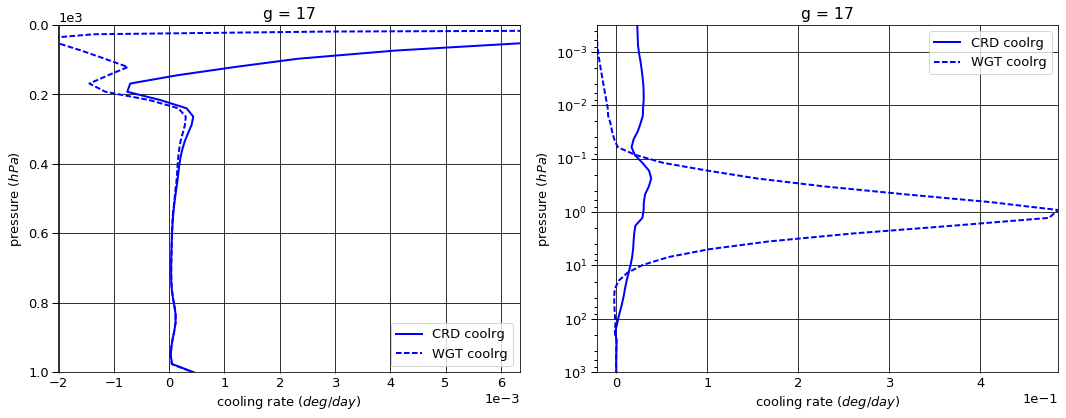

# Figure: cooling rate g-group 18

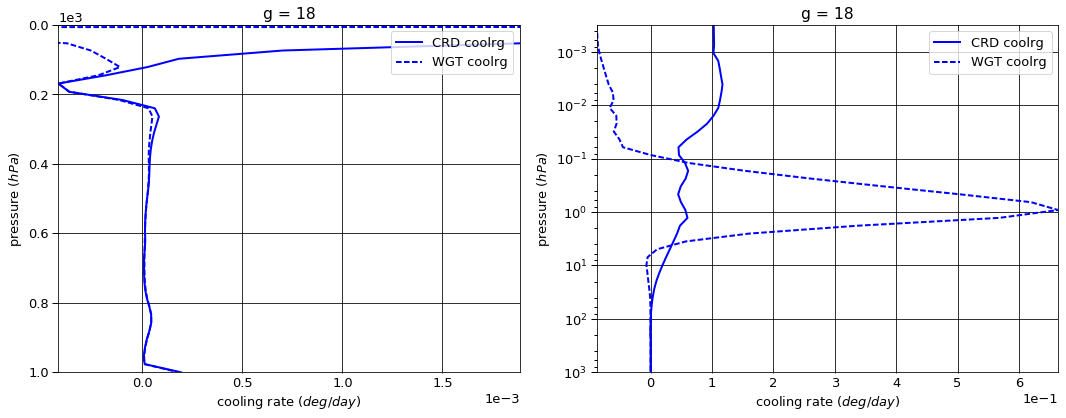

# Figure: cooling rate g-group 19

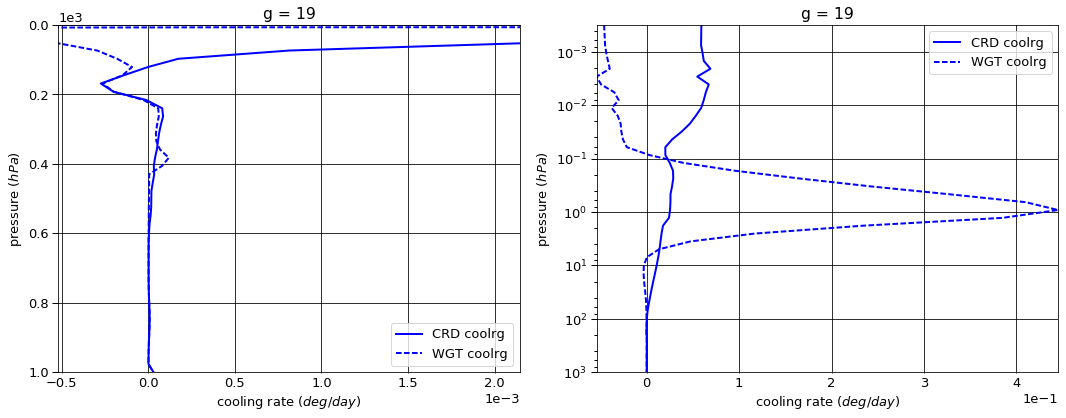

# Figure: cooling rate g-group 20

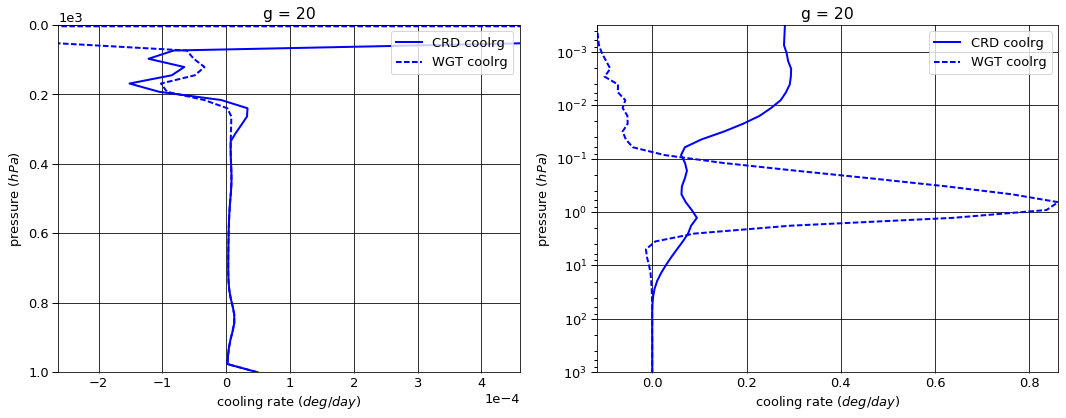

# Figure: cooling rate g-group total

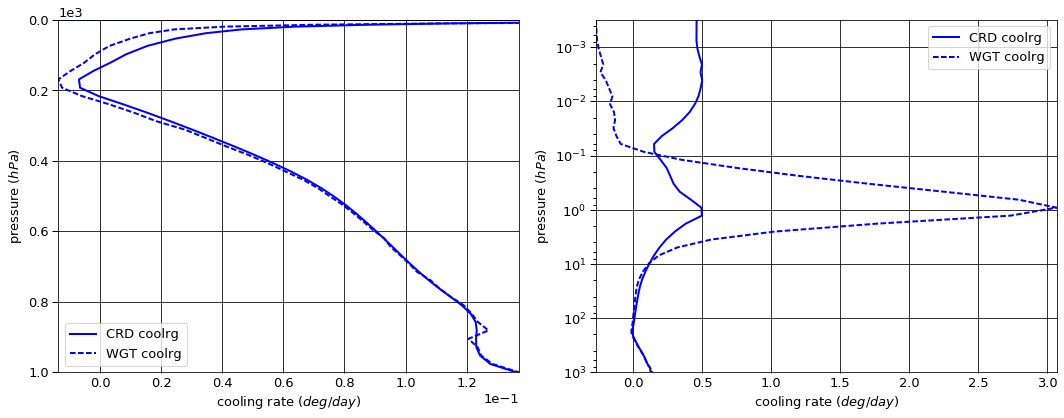

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -1.813346  0.000000 -1.813346
   1013.0   76    -1.817687  0.021268 -1.796419
2  0.0      1     -2.733281  0.000000 -2.733281
   1013.0   76    -2.744973  0.057853 -2.687119
3  0.0      1     -2.443592  0.000000 -2.443592
   1013.0   76    -2.463772  0.097743 -2.366028
4  0.0      1     -2.337956  0.000000 -2.337956
   1013.0   76    -2.371828  0.162080 -2.209748
5  0.0      1     -2.315038  0.000000 -2.315038
   1013.0   76    -2.375639  0.273787 -2.101853
6  0.0      1     -1.859391  0.000000 -1.859391
   1013.0   76    -1.941907  0.351646 -1.590262
7  0.0      1     -1.997658  0.000000 -1.997658
   1013.0   76    -2.157698  0.621597 -1.536102
8  0.0      1     -1.632191  0.000000 -1.632191
   1013.0   76    -1.857158  0.771048 -1.086110
9  0.0      1     -1.366738  0.000000 -1.366738
   1013.0   76    -1.665677  0.996025 -0.669652
10 0.0      1     -2.104022  0.000000 -2.104022
   1013.0   76    -2.892607  2.212330 -0.680278
11 0.0      1     -2.579359  0.000000 -2.579359
   1013.0   76    -4.015711  3.471144 -0.544567
12 0.0      1     -1.132978  0.000000 -1.132978
   1013.0   76    -2.068899  1.956524 -0.112374
13 0.0      1     -0.598366  0.000000 -0.598366
   1013.0   76    -1.304653  1.273431 -0.031222
14 0.0      1     -0.356238  0.000000 -0.356238
   1013.0   76    -0.935453  0.922797 -0.012656
15 0.0      1     -0.234633  0.000000 -0.234633
   1013.0   76    -0.697047  0.691241 -0.005806
16 0.0      1     -0.139023  0.000000 -0.139023
   1013.0   76    -0.444057  0.441492 -0.002565
17 0.0      1     -0.110363  0.000000 -0.110363
   1013.0   76    -0.337492  0.336111 -0.001381
18 0.0      1     -0.077873  0.000000 -0.077873
   1013.0   76    -0.195170  0.194605 -0.000565
19 0.0      1     -0.049577  0.000000 -0.049577
   1013.0   76    -0.133703  0.133619 -0.000084
20 0.0      1     -0.097254  0.000000 -0.097254
   1013.0   76    -0.216413  0.216276 -0.000136


WGT


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -1.813343  0.000000 -1.813343
   1013.0   76    -1.817687  0.021280 -1.796407
2  0.0      1     -2.733265  0.000000 -2.733265
   1013.0   76    -2.744973  0.057947 -2.687025
3  0.0      1     -2.443544  0.000000 -2.443544
   1013.0   76    -2.463772  0.097970 -2.365802
4  0.0      1     -2.337877  0.000000 -2.337877
   1013.0   76    -2.371828  0.162556 -2.209272
5  0.0      1     -2.314849  0.000000 -2.314849
   1013.0   76    -2.375639  0.274913 -2.100726
6  0.0      1     -1.859086  0.000000 -1.859086
   1013.0   76    -1.941907  0.353739 -1.588168
7  0.0      1     -1.996801  0.000000 -1.996801
   1013.0   76    -2.157698  0.627555 -1.530143
8  0.0      1     -1.629753  0.000000 -1.629753
   1013.0   76    -1.857158  0.780444 -1.076714
9  0.0      1     -1.364277  0.000000 -1.364277
   1013.0   76    -1.665677  1.005030 -0.660647
10 0.0      1     -2.095479  0.000000 -2.095479
   1013.0   76    -2.892607  2.226915 -0.665693
11 0.0      1     -2.550936  0.000000 -2.550936
   1013.0   76    -4.015711  3.502731 -0.512980
12 0.0      1     -1.119476  0.000000 -1.119476
   1013.0   76    -2.068899  1.964706 -0.104193
13 0.0      1     -0.589731  0.000000 -0.589731
   1013.0   76    -1.304653  1.275274 -0.029379
14 0.0      1     -0.344180  0.000000 -0.344180
   1013.0   76    -0.935453  0.923565 -0.011887
15 0.0      1     -0.255733  0.000000 -0.255733
   1013.0   76    -0.697047  0.691488 -0.005559
16 0.0      1     -0.164375  0.000000 -0.164375
   1013.0   76    -0.444057  0.441667 -0.002390
17 0.0      1     -0.177813  0.000000 -0.177813
   1013.0   76    -0.337492  0.336203 -0.001289
18 0.0      1     -0.121410  0.000000 -0.121410
   1013.0   76    -0.195170  0.194653 -0.000517
19 0.0      1     -0.083923  0.000000 -0.083923
   1013.0   76    -0.133703  0.133619 -0.000084
20 0.0      1     -0.129713  0.000000 -0.129713
   1013.0   76    -0.216413  0.216276 -0.000136


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1      0.000004  0.000000  0.000004
   1013.0   76     0.000000  0.000012  0.000012
2  0.0      1      0.000015  0.000000  0.000015
   1013.0   76     0.000000  0.000094  0.000094
3  0.0      1      0.000047  0.000000  0.000047
   1013.0   76     0.000000  0.000226  0.000226
4  0.0      1      0.000079  0.000000  0.000079
   1013.0   76     0.000000  0.000476  0.000476
5  0.0      1      0.000189  0.000000  0.000189
   1013.0   76     0.000000  0.001127  0.001127
6  0.0      1      0.000305  0.000000  0.000305
   1013.0   76     0.000000  0.002093  0.002094
7  0.0      1      0.000857  0.000000  0.000857
   1013.0   76     0.000000  0.005958  0.005958
8  0.0      1      0.002439  0.000000  0.002439
   1013.0   76     0.000000  0.009396  0.009396
9  0.0      1      0.002461  0.000000  0.002461
   1013.0   76     0.000000  0.009004  0.009004
10 0.0      1      0.008543  0.000000  0.008543
   1013.0   76     0.000000  0.014585  0.014585
11 0.0      1      0.028423  0.000000  0.028423
   1013.0   76     0.000000  0.031587  0.031587
12 0.0      1      0.013502  0.000000  0.013502
   1013.0   76     0.000000  0.008182  0.008182
13 0.0      1      0.008635  0.000000  0.008635
   1013.0   76     0.000000  0.001843  0.001843
14 0.0      1      0.012059  0.000000  0.012059
   1013.0   76     0.000000  0.000768  0.000769
15 0.0      1     -0.021100  0.000000 -0.021100
   1013.0   76     0.000000  0.000247  0.000247
16 0.0      1     -0.025352  0.000000 -0.025352
   1013.0   76     0.000000  0.000174  0.000174
17 0.0      1     -0.067449  0.000000 -0.067449
   1013.0   76     0.000000  0.000092  0.000092
18 0.0      1     -0.043538  0.000000 -0.043538
   1013.0   76     0.000000  0.000048  0.000048
19 0.0      1     -0.034345  0.000000 -0.034345
   1013.0   76     0.000000  0.000000  0.000000
20 0.0      1     -0.032459  0.000000 -0.032459
   1013.0   76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -5.933798e-07
   1001.112500 75     5.889847e-04
2  0.000312    1     -1.718535e-06
   1001.112500 75     1.589255e-03
3  0.000312    1     -1.357287e-05
   1001.112500 75     2.613123e-03
4  0.000312    1     -9.561839e-06
   1001.112500 75     4.164990e-03
5  0.000312    1     -1.668891e-05
   1001.112500 75     6.638377e-03
6  0.000312    1     -4.541612e-05
   1001.112500 75     7.922365e-03
7  0.000312    1     -6.701642e-05
   1001.112500 75     1.256266e-02
8  0.000312    1     -2.800841e-04
   1001.112500 75     1.357736e-02
9  0.000312    1     -1.202789e-04
   1001.112500 75     1.479217e-02
10 0.000312    1     -3.638805e-04
   1001.112500 75     2.418210e-02
11 0.000312    1     -7.641455e-04
   1001.112500 75     2.790820e-02
12 0.000312    1     -8.673615e-04
   1001.112500 75     9.916187e-03
13 0.000312    1     -8.971819e-04
   1001.112500 75     4.417841e-03
14 0.000312    1     -4.131373e-04
   1001.112500 75     2.468907e-03
15 0.000312    1     -3.568212e-03
   1001.112500 75     1.467379e-03
16 0.000312    1     -4.992623e-04
   1001.112500 75     7.463865e-04
17 0.000312    1      2.318329e-02
   1001.112500 75     4.458296e-04
18 0.000312    1      1.027866e-01
   1001.112500 75     1.930003e-04
19 0.000312    1      5.911861e-02
   1001.112500 75     3.036314e-05
20 0.000312    1      2.813806e-01
   1001.112500 75     4.916468e-05


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -5.992938e-07
   1001.112500 75     5.896075e-04
2  0.000312    1     -1.706622e-06
   1001.112500 75     1.593898e-03
3  0.000312    1     -1.364214e-05
   1001.112500 75     2.596509e-03
4  0.000312    1     -9.876885e-06
   1001.112500 75     4.169733e-03
5  0.000312    1     -1.741956e-05
   1001.112500 75     6.700446e-03
6  0.000312    1     -5.234798e-05
   1001.112500 75     8.012744e-03
7  0.000312    1     -7.654820e-05
   1001.112500 75     1.283619e-02
8  0.000312    1     -3.583426e-04
   1001.112500 75     1.395565e-02
9  0.000312    1     -1.487161e-04
   1001.112500 75     1.500151e-02
10 0.000312    1     -4.556012e-04
   1001.112500 75     2.445479e-02
11 0.000312    1     -1.356401e-03
   1001.112500 75     2.788060e-02
12 0.000312    1     -2.030183e-04
   1001.112500 75     9.735407e-03
13 0.000312    1      2.406674e-04
   1001.112500 75     4.327728e-03
14 0.000312    1      3.913543e-04
   1001.112500 75     2.442292e-03
15 0.000312    1      2.145995e-03
   1001.112500 75     1.455125e-03
16 0.000312    1      1.346846e-03
   1001.112500 75     7.306962e-04
17 0.000312    1     -2.142647e-02
   1001.112500 75     4.307974e-04
18 0.000312    1     -8.793214e-02
   1001.112500 75     1.817229e-04
19 0.000312    1     -4.610305e-02
   1001.112500 75     3.036314e-05
20 0.000312    1     -1.179239e-01
   1001.112500 75     4.916468e-05


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -5.914020e-09
   1001.112500 75     6.228000e-07
2  0.000312    1      1.191210e-08
   1001.112500 75     4.642300e-06
3  0.000312    1     -6.926300e-08
   1001.112500 75    -1.661380e-05
4  0.000312    1     -3.150459e-07
   1001.112500 75     4.743200e-06
5  0.000312    1     -7.306540e-07
   1001.112500 75     6.206860e-05
6  0.000312    1     -6.931861e-06
   1001.112500 75     9.037930e-05
7  0.000312    1     -9.531779e-06
   1001.112500 75     2.735330e-04
8  0.000312    1     -7.825845e-05
   1001.112500 75     3.782900e-04
9  0.000312    1     -2.843717e-05
   1001.112500 75     2.093460e-04
10 0.000312    1     -9.172069e-05
   1001.112500 75     2.726870e-04
11 0.000312    1     -5.922560e-04
   1001.112500 75    -2.760700e-05
12 0.000312    1      6.643432e-04
   1001.112500 75    -1.807798e-04
13 0.000312    1      1.137849e-03
   1001.112500 75    -9.011260e-05
14 0.000312    1      8.044916e-04
   1001.112500 75    -2.661510e-05
15 0.000312    1      5.714207e-03
   1001.112500 75    -1.225430e-05
16 0.000312    1      1.846109e-03
   1001.112500 75    -1.569034e-05
17 0.000312    1     -4.460977e-02
   1001.112500 75    -1.503218e-05
18 0.000312    1     -1.907187e-01
   1001.112500 75    -1.127740e-05
19 0.000312    1     -1.052217e-01
   1001.112500 75     0.000000e+00
20 0.000312    1     -3.993044e-01
   1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-25.978879,0.000000,-25.978879
1013.0,76,-32.637543,15.202617,-17.434926



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-26.125564,0.000000,-26.125564
1013.0,76,-32.637543,15.288531,-17.349012



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.146685,0.000000,-0.146685
1013.0,76,0.000000,0.085914,0.085914


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.458541
1001.112500,75,0.136275



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.271955
1001.112500,75,0.137175



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.730496
1001.112500,75,0.000900


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.057688,0.054243
2,0.086500,0.082322
3,0.077250,0.074146
4,0.074000,0.071637
5,0.073813,0.071970
6,0.060187,0.058934
7,0.066500,0.065761
8,0.056938,0.056832
9,0.050750,0.051210


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.959058e-25
2,5.467975e-25
3,1.010414e-24
4,1.867121e-24
5,3.450210e-24
6,6.375563e-24
7,1.178125e-23
8,2.177031e-23
9,4.022884e-23


In [23]:
def spreadsheet():
    ng = 20
    ng_refs = [20]
    p_refs = [500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [24]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,2.959058e-25,NaN,0.057688,0.054243,0.057688,0.054243,500.0
2,5.467975e-25,NaN,0.086500,0.082322,0.144187,0.136565,500.0
3,1.010414e-24,1.847877,0.077250,0.074146,0.221438,0.210711,500.0
4,1.867121e-24,1.847877,0.074000,0.071637,0.295438,0.282348,500.0
5,3.450210e-24,1.847877,0.073813,0.071970,0.369250,0.354318,500.0
6,6.375563e-24,1.847877,0.060187,0.058934,0.429438,0.413251,500.0
7,1.178125e-23,1.847877,0.066500,0.065761,0.495938,0.479013,500.0
8,2.177031e-23,1.847877,0.056938,0.056832,0.552875,0.535845,500.0
9,4.022884e-23,1.847877,0.050750,0.051210,0.603625,0.587055,500.0


In [25]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# Histogram of wavenumbers in g-group 1

In [26]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [27]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')